## Google Play Store App Analysis

### Introduction

The Google Play Store serves as a hub for millions of Android applications spanning various categories, target audiences, and purposes. In this project, we aim to perform an end-to-end data analysis using Python to explore trends, patterns, and actionable insights within the app marketplace.

This analysis includes:

- Cleaning and preprocessing the dataset (handling missing values, converting data types, etc.)
- Exploratory Data Analysis (EDA) and visualizations
- Feature engineering (e.g., install categories)
- Uncovering relationships between app attributes such as genre, price, installs, size, reviews, and ratings

The ultimate goal is to understand how different factors influence app popularity and user satisfaction, and to present data-driven insights that could help developers and product teams make informed decisions.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data=pd.read_csv('C:\\Users\\ACER\\Downloads\\googleplaystore.csv')

### Basic data exploration

#### Displaying First Few Records of Dataset

In [3]:
 # Display the first few rows
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Displaying Last Few Records of Dataset

In [4]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### Shape of the Dataset

In [5]:
print('Number of rows in dataset are: ',data.shape[0])
print('Number of columns in dataset are: ',data.shape[1])

Number of rows in dataset are:  10841
Number of columns in dataset are:  13


#### Basic Info of the Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As we know there are total 10841 records

Columns Rating,Type,Content Rating,Current Ver,Android Ver have some null values

Columns Reviews,Size,Installs,Price have wrong data types

#### Statistics of Numerical columns

In [7]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Data Cleaning

#### Checking missing values

In [16]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As we can see there are 1474 null values in Rating , 1 null value in type and price column , 8 in current version and 3 in android version

#### Handling missing values

In [10]:
data.Rating.fillna(data['Rating'].mean(),inplace=True)

Filled the missing values in Rating column with the mean value of rating column because there are large amount of missing values in Rating we cannot drop them all as it will cause high data loss

In [11]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

Now the missing values are remained in Type,Content Rating,Current Ver and Android Ver columns . Because these are less in number we can drop them as it will not cause high data loss

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

All the missing values are handled in all the columns

In [14]:
data.shape

(10829, 13)

Now we are left with 10829 records in the dataset

Now resetting the index

In [15]:
data.reset_index(drop=True,inplace=True)

In [16]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Correcting the data types of columns

##### Changing datatype of column review

In [20]:
print(data.Reviews.dtype)

int32


The existing data type of Reviews column is object

In [21]:
data['Reviews']=data.Reviews.astype('int')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


The data type of Reviews column is changed to int32

##### Changing data type of column Size

In [23]:
print(data.Size.dtype)

object


Existing data type of size column is object

In [24]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Checking the number of values in three different categories in Size

In [25]:
print('Number of M in size column',data.loc[data['Size'].str.contains('M'),'Size'].count())
print('Number of K in size column',data.loc[data['Size'].str.contains('k'),'Size'].count())
print('Number of rows showing Varies with device in size column',data.loc[data['Size'].str.contains('Varies with device'),'Size'].count())

Number of M in size column 8823
Number of K in size column 312
Number of rows showing Varies with device in size column 1694


In [26]:
# Replacing Varies with device value in size column with null value
data['Size'].replace('Varies with device',np.NaN,inplace=True)

In [27]:
def convert_to_mb(value):
    if isinstance(value,str):
        if 'k' in value:
            return float(value.replace('k',''))/1024      # Kilobytes to megabytes
        elif 'M' in value:
            return float(value.replace('M',''))
        else:
            return np.NaN
    return value
        

In [28]:
data['Size']=data['Size'].apply(convert_to_mb)

In [29]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


All the sizes are converted to unit Megabytes and then
data Type of size column is changed to float64

##### Changing data type of column installs

In [31]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [32]:
def clean_installs(value):
    if isinstance(value,str):
            value=value.replace('+','').replace(',','')
            if value.isdigit():
                return int(value)
            else:
                return np.NaN
    return value

In [33]:
data['Installs']=data.Installs.apply(clean_installs)

In [34]:
data['Installs'].value_counts()

Installs
1000000       1578
10000000      1252
100000        1169
10000         1052
1000           905
5000000        752
100            718
500000         538
50000          478
5000           476
100000000      409
10             385
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: count, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1.0+ MB


Data type of column installs is changed to int64

##### Making a new column called installs_category

In [36]:
bins=[-1,0,10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
data['Installs_Category']=pd.cut(data['Installs'],bins=bins,labels=labels)

In [37]:
data['Installs_Category'].value_counts()

Installs_Category
Low                   2158
High                  2116
Very High             2004
More than moderate    1647
Moderate              1528
Top Notch              828
Very low               534
no                      14
Name: count, dtype: int64

In [38]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,More than moderate


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10829 non-null  object  
 1   Category           10829 non-null  object  
 2   Rating             10829 non-null  float64 
 3   Reviews            10829 non-null  int32   
 4   Size               9135 non-null   float64 
 5   Installs           10829 non-null  int64   
 6   Type               10829 non-null  object  
 7   Price              10829 non-null  object  
 8   Content Rating     10829 non-null  object  
 9   Genres             10829 non-null  object  
 10  Last Updated       10829 non-null  object  
 11  Current Ver        10829 non-null  object  
 12  Android Ver        10829 non-null  object  
 13  Installs_Category  10829 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1), object(9)
memory usage: 1.0+ MB


##### Changing the data type of Price column

In [40]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [41]:
def adjust_price(value):
    if isinstance(value,str):
        return float(value.replace('$',''))
    return value

In [42]:
data['Price']=data.Price.apply(adjust_price)
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Category
10824,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Moderate
10825,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Low
10826,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Low
10827,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Low
10828,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,Very High


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10829 non-null  object  
 1   Category           10829 non-null  object  
 2   Rating             10829 non-null  float64 
 3   Reviews            10829 non-null  int32   
 4   Size               9135 non-null   float64 
 5   Installs           10829 non-null  int64   
 6   Type               10829 non-null  object  
 7   Price              10829 non-null  float64 
 8   Content Rating     10829 non-null  object  
 9   Genres             10829 non-null  object  
 10  Last Updated       10829 non-null  object  
 11  Current Ver        10829 non-null  object  
 12  Android Ver        10829 non-null  object  
 13  Installs_Category  10829 non-null  category
dtypes: category(1), float64(3), int32(1), int64(1), object(8)
memory usage: 1.0+ MB


Data type of price column is changed to float64

#### Statistics of numerical columns

In [44]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10829.000000,1.082900e+04,9135.000000,1.082900e+04,10829.000000
mean,4.192041,4.446018e+05,21.534596,1.547990e+07,1.028091
std,0.479038,2.929213e+06,22.593997,8.507114e+07,15.957778
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,4.900000,5.000000e+03,0.000000
50%,4.200000,2.100000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#### Transforming column Content Rating by simplifying the categories

In [45]:
data['Content Rating'].value_counts()

Content Rating
Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [46]:
# Transforming content rating column

def simplify_content_rating(value):
    if value in ['Everyone','Everyone 10+']:
        return 'Everyone'
    elif value in ['Teen']:
        return 'Teen'
    elif value in ['Mature 17+','Adults only 18+']:
        return 'Adults 18+'
    elif value=='Unrated':
        return 'Unknown'
    else:
        return value
    

In [47]:
data['Content Rating']=data['Content Rating'].apply(simplify_content_rating)

In [48]:
data['Content Rating'].value_counts()

Content Rating
Everyone      9117
Teen          1208
Adults 18+     502
Unknown          2
Name: count, dtype: int64

Now there are these 4 categories in Content Rating column

#### Transforming Genres column

In [49]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [50]:
# Keeping only the first part of Genres values
data['Genres']=data['Genres'].apply(lambda x:x.split(';')[0] if isinstance(x,str) else x)

In [51]:
data['Genres'].value_counts()

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

#### Checking and handling null values after cleaning

In [52]:
data.isnull().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Size                 1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_Category       0
dtype: int64

Null values are introduced in size column because we have replaced the value varies with device with null

Filling the null values with median size

In [53]:
data['Size'].fillna(data['Size'].median(),inplace=True)

In [54]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Installs_Category    0
dtype: int64

#### Checking Duplicates

In [55]:
# Duplicates
data.duplicated().sum()

483

There are 483 duplicates rows

#### Dropping duplicates

In [56]:
data.drop_duplicates(inplace=True)

In [57]:
# Checking the correlation between numeric cols
numeric_data=data.select_dtypes(['int','float'])

In [58]:
data.shape

(10346, 14)

Now we are left with only 10346 records

### EDA

#### 1. Checking correlation between numerical columns

In [59]:
numeric_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068359,0.062442,0.050462,-0.020575
Reviews,0.068359,1.000000,0.107741,0.634987,-0.009424
Size,0.062442,0.107741,1.000000,0.050008,-0.020578
Installs,0.050462,0.634987,0.050008,1.000000,-0.011155
Price,-0.020575,-0.009424,-0.020578,-0.011155,1.000000


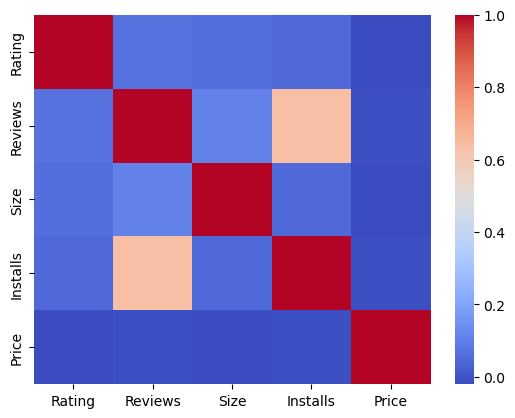

In [60]:
sns.heatmap(numeric_data.corr(), cmap='coolwarm')
plt.show()

 There is high correlation between Installs and Reviews columns

#### 2. Average Rating by Genres

In [61]:
data[['Rating','Genres']].groupby('Genres').mean().sort_values(by='Rating',ascending=False).head(10)

,Rating
Genres,
Word,4.389048
Events,4.363647
Puzzle,4.363189
Art & Design,4.356961
Books & Reference,4.310978
Personalization,4.304871
Music & Audio,4.300000
Arcade,4.299174
Board,4.294921


Genre 'Word' has highest rating followed by Genre 'Events'

#### 3. Free vs. Paid App Performance

In [62]:
data[['Type','Rating','Installs']].groupby('Type').mean()

,Rating,Installs
Type,,
Free,4.183992,1.529227e+07
Paid,4.248155,9.078067e+04


Free apps has more installs as compared with Paid apps but Paid apps has higher rating than Free apps.

#### Average Size and Rating by Install Category

In [63]:
data[['Size','Rating','Installs_Category']].groupby('Installs_Category').mean()

,Size,Rating
Installs_Category,,
no,13.028571,4.193338
Very low,13.913342,4.260767
Low,13.946622,4.179604
Moderate,14.973934,4.040645
More than moderate,19.032120,4.096563
High,23.725691,4.207079
Very High,26.259301,4.285675
Top Notch,29.771238,4.372170


We can see that installs_category is directly proportional to Size of app . It means the apps which are higher in size have higher installs.

#### Category having highest number of apps

In [64]:
data[['Category','App']].groupby('Category').count().sort_values(by='App',ascending=False)

,App
Category,
FAMILY,1939
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,386
LIFESTYLE,373
COMMUNICATION,366


Family category of apps has highest number of apps followed by Game Category.

#### Category having highest number of installs

In [65]:
data[['Category','Installs']].groupby('Category').sum().sort_values(by='Installs',ascending=False)

,Installs
Category,
GAME,31544024415
COMMUNICATION,24152276251
SOCIAL,12513867902
PRODUCTIVITY,12463091369
TOOLS,11452271905
FAMILY,10041632405
PHOTOGRAPHY,9721247655
TRAVEL_AND_LOCAL,6361887146
VIDEO_PLAYERS,6222002720


Game category of apps has highest number of installs . May be the mostly users are children installing games.

#### Category having highest number of reviews

In [66]:
data[['Category','Reviews']].groupby('Category').sum().sort_values(by='Reviews',ascending=False)

,Reviews
Category,
GAME,1415536650
COMMUNICATION,601273552
SOCIAL,533576829
FAMILY,396771746
TOOLS,273181033
PHOTOGRAPHY,204297410
VIDEO_PLAYERS,110380188
PRODUCTIVITY,102554498
SHOPPING,94931162


Game category of apps has highest number of reviews. This may be because Game category has highest number of installs

#### Category having highest rating

In [67]:
data[['Category','Rating']].groupby(by='Category').mean().sort_values(by='Rating',ascending=False)

,Rating
Category,
EDUCATION,4.374564
ART_AND_DESIGN,4.368438
EVENTS,4.363647
BOOKS_AND_REFERENCE,4.312461
PERSONALIZATION,4.304871
PARENTING,4.282223
GAME,4.277598
BEAUTY,4.260882
HEALTH_AND_FITNESS,4.251656


Education Category has highest rating . It means that educational apps are liked most by users.

#### Most Expensive App

In [69]:
paid_apps_data=data[data['Type']=='Paid']
paid_apps_data.sort_values(by='Price',ascending=False)[['App','Price']].head(1)

,App,Price
4365,I'm Rich - Trump Edition,400.0


I'm Rich - Trump Edition is the most expensive app

### Visualization

#### 1. Distribution of Rating column

<Axes: xlabel='Rating', ylabel='Count'>

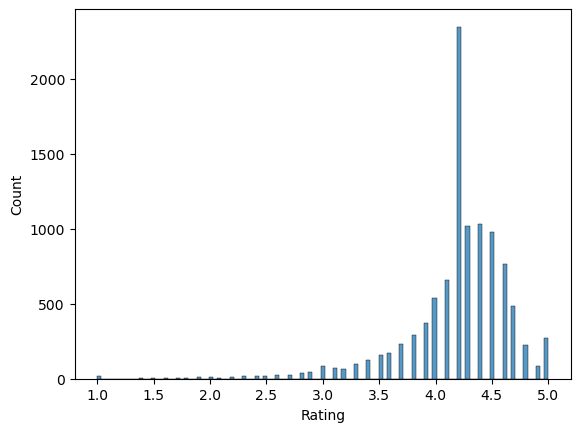

In [70]:
sns.histplot(data.Rating)

Most of the ratings are between 4 to 5

#### Distribution of Free and Paid Apps

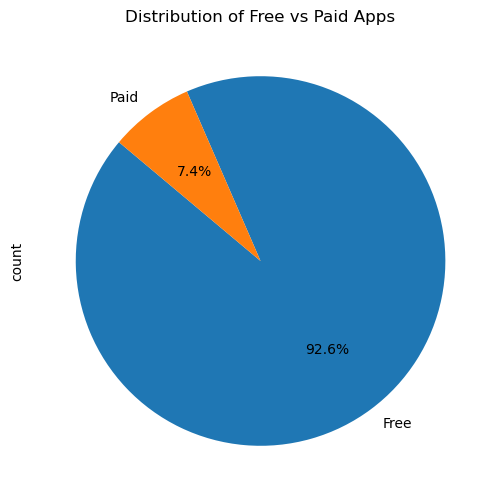

In [71]:
data['Type'].value_counts().plot(kind='pie',startangle=140,figsize=(6,6),autopct='%1.1f%%')
plt.title('Distribution of Free vs Paid Apps')
plt.show()

Free Apps are much higher in number as compared to Paid Apps

#### Top 10 Genres by App Count

In [72]:
top_genres=data['Genres'].value_counts().head(10)
top_genres

Genres
Tools              841
Entertainment      627
Education          609
Business           427
Medical            408
Productivity       407
Personalization    386
Lifestyle          374
Action             371
Sports             368
Name: count, dtype: int64

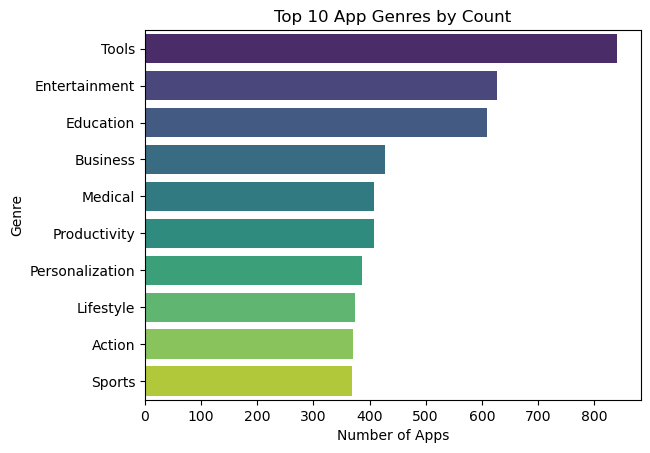

In [73]:
sns.barplot(x=top_genres.values,y=top_genres.index,palette='viridis')
plt.title('Top 10 App Genres by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.show()

Hence, Tools Genre has highest number of Apps followed by entertainment.

#### Rating DIstribution of Free vs Paid Apps

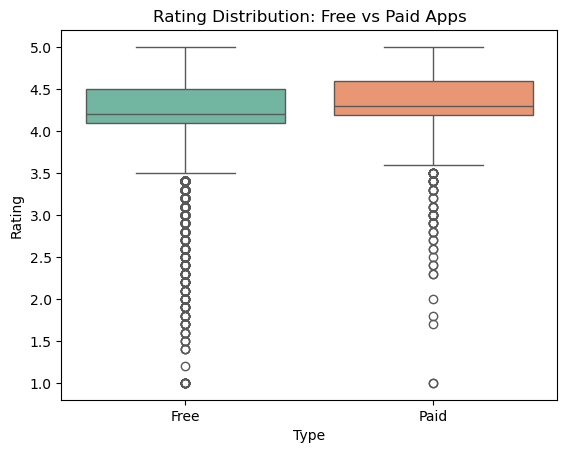

In [74]:
# 3. Boxplot: Rating Distribution by App Type
sns.boxplot(x='Type',y='Rating',data=data,palette='Set2')
plt.title('Rating Distribution: Free vs Paid Apps')
plt.show()

#### Correlation between App Size and Ratings

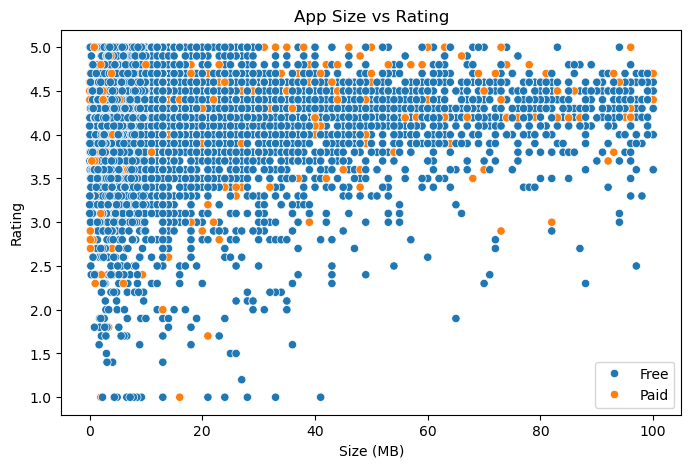

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='Size',y='Rating',hue='Type')
plt.title('App Size vs Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.legend()
plt.show()

All Apps which are high in size have high rating between 3.5 to 5 but the apps which are small in size also have low rating.

#### Average Rating by Install Category

In [76]:
rating_by_installs = data.groupby('Installs_Category')['Rating'].mean().reindex(data['Installs_Category'].cat.categories)

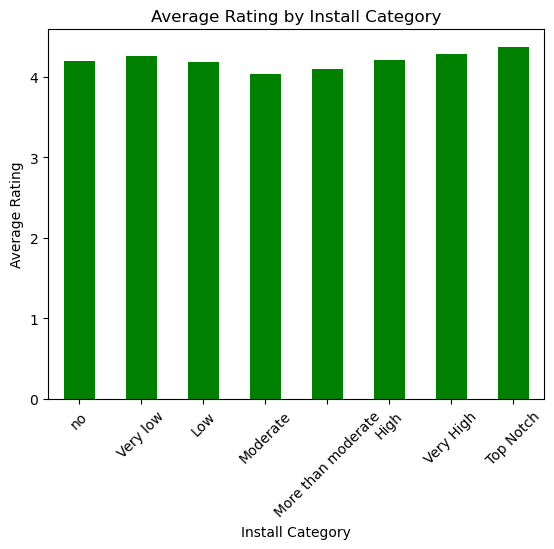

In [77]:
rating_by_installs.plot(kind='bar', color='green')
plt.title('Average Rating by Install Category')
plt.xlabel('Install Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

The ' Top Notch ' install category i.e apps having high installs have high average rating

#### Top 10 Genres By Total Installs

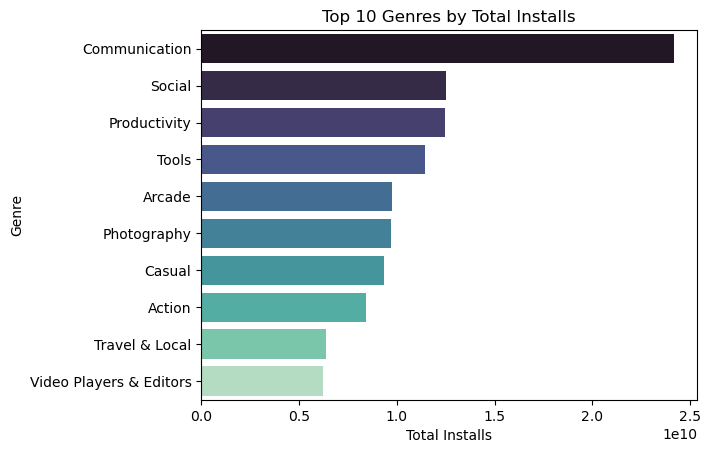

In [78]:
top_installed_genres=data[['Genres','Installs']].groupby('Genres').sum().reset_index().sort_values(by='Installs',ascending=False).head(10)
sns.barplot(x='Installs',y='Genres',data=top_installed_genres,palette='mako')
plt.title('Top 10 Genres by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Genre')
plt.show()

Communication Genre have highest number of installs

#### Correlation between Price and Ratings of apps

<Axes: xlabel='Price', ylabel='Rating'>

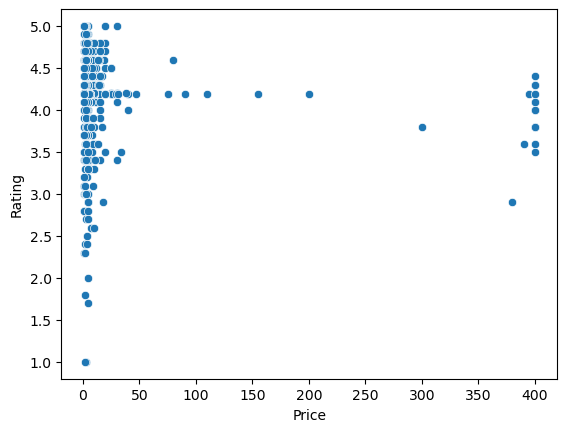

In [79]:
paid_apps_data=data[data['Type']=='Paid']
sns.scatterplot(x='Price',y='Rating',data=paid_apps_data)

Apps which have low price have mixed (low , high) ratings but the apps which are costly mostly have high rating

#### Content Rating vs Installs

In [80]:
data['Content Rating'].value_counts()

Content Rating
Everyone      8748
Teen          1146
Adults 18+     450
Unknown          2
Name: count, dtype: int64

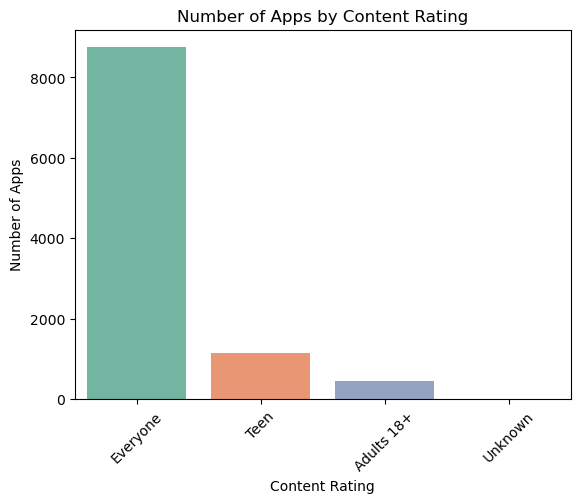

In [81]:
content_counts=data['Content Rating'].value_counts()
sns.barplot(x=content_counts.index,y=content_counts.values,palette='Set2')
plt.title('Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()


Most of the Apps have content rating for everyone.

### Conclusion

Through extensive analysis of the Google Play Store dataset, we discovered several key insights:

- **Free apps dominate** the marketplace, and they tend to have significantly higher install counts than paid apps.
- App **genres such as Tools, Entertainment, and Education** have the largest number of offerings.
- **Game and Communication apps** are among the most installed, but not necessarily the highest rated.
- App **ratings do not strongly correlate with size or price**, though there is some variation across install categories.
- **Paid apps are fewer** and do not guarantee higher ratings or installs.
- Users tend to prefer apps that are **small in size** and belong to universally appealing content ratings like “Everyone”.

This project demonstrates a full data analysis pipeline—from raw data cleaning to insightful visualizations and interpretation—using Python libraries such as Pandas, Matplotlib, and Seaborn.